# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
first(data,10)

10×2 DataFrame
│ Row │ x      │ y      │
│     │ Int64  │ Int64  │
├─────┼────────┼────────┤
│ 1   │ 664159 │ 550946 │
│ 2   │ 665845 │ 557965 │
│ 3   │ 597173 │ 575538 │
│ 4   │ 618600 │ 551446 │
│ 5   │ 635690 │ 608046 │
│ 6   │ 588100 │ 557588 │
│ 7   │ 582015 │ 546191 │
│ 8   │ 604678 │ 574577 │
│ 9   │ 572029 │ 518313 │
│ 10  │ 604737 │ 574591 │

In [4]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [5]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([606574.9562289562 852058.4525993884 … 670929.0681818182 417799.6942675159; 574455.1683501684 157685.52293577982 … 862765.7329545454 787001.9936305733], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [297, 327, 669, 319, 120, 340, 349, 316, 350, 351, 221, 340, 335, 352, 314], [297, 327, 669, 319, 120, 340, 349, 316, 350, 351, 221, 340, 335, 352, 314], 1.3502869189827123e13, 14, true)

In [6]:
data[!, :cluster] = string.(assignments(result));

In [7]:
result.centers

2×15 Array{Float64,2}:
 606575.0  852058.0  369091.0  823421.0  …  168295.0  670929.0  417800.0
 574455.0  157686.0  481231.0  731145.0     347725.0  862766.0  787002.0

In [9]:
using Gadfly

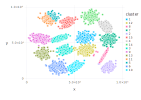

In [10]:
plot(data, x="x", y="y", color="cluster", Geom.point)